## Relatório de Análise

## Criando Agrupamentos

In [235]:
import pandas as pd

In [236]:
dados = pd.read_csv('dados/database_norte.csv', sep = ';')

In [237]:
dados.head(10)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,Valor casoseObitosAcumulados
0,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,2020-03-27,13,22945.0,0,0,0,0
1,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,2020-03-28,13,22945.0,0,0,0,0
2,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,2020-03-29,14,22945.0,0,0,0,0
3,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,2020-03-30,14,22945.0,0,0,0,0
4,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,2020-03-31,14,22945.0,0,0,0,0
5,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,2020-04-01,14,22945.0,0,0,0,0
6,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,2020-04-02,14,22945.0,0,0,0,0
7,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,2020-04-03,14,22945.0,0,0,0,0
8,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,2020-04-04,14,22945.0,0,0,0,0
9,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,2020-04-05,15,22945.0,0,0,0,0


In [238]:
dados['casosAcumulado'].mean()

1002.8552136752137

In [239]:
municipios = ['Manaus','Parintins','Iranduba','Manacapuru']
selecao = dados['municipio'].isin(municipios)
data = dados[selecao]


In [240]:
dados['municipio'].drop_duplicates()

0         Alta Floresta D'Oeste
299                   Ariquemes
598                      Cabixi
897                      Cacoal
1196                 Cerejeiras
                  ...          
133055           Tocantinópolis
133354                 Tupirama
133653               Tupiratins
133952             Wanderlândia
134251                  Xambioá
Name: municipio, Length: 448, dtype: object

In [241]:
grupo_municipios = data.groupby('municipio')

In [242]:
type(grupo_municipios)

pandas.core.groupby.generic.DataFrameGroupBy

In [243]:
grupo_municipios.groups

{'Iranduba': [30199, 30200, 30201, 30202, 30203, 30204, 30205, 30206, 30207, 30208, 30209, 30210, 30211, 30212, 30213, 30214, 30215, 30216, 30217, 30218, 30219, 30220, 30221, 30222, 30223, 30224, 30225, 30226, 30227, 30228, 30229, 30230, 30231, 30232, 30233, 30234, 30235, 30236, 30237, 30238, 30239, 30240, 30241, 30242, 30243, 30244, 30245, 30246, 30247, 30248, 30249, 30250, 30251, 30252, 30253, 30254, 30255, 30256, 30257, 30258, 30259, 30260, 30261, 30262, 30263, 30264, 30265, 30266, 30267, 30268, 30269, 30270, 30271, 30272, 30273, 30274, 30275, 30276, 30277, 30278, 30279, 30280, 30281, 30282, 30283, 30284, 30285, 30286, 30287, 30288, 30289, 30290, 30291, 30292, 30293, 30294, 30295, 30296, 30297, 30298, ...], 'Manacapuru': [32591, 32592, 32593, 32594, 32595, 32596, 32597, 32598, 32599, 32600, 32601, 32602, 32603, 32604, 32605, 32606, 32607, 32608, 32609, 32610, 32611, 32612, 32613, 32614, 32615, 32616, 32617, 32618, 32619, 32620, 32621, 32622, 32623, 32624, 32625, 32626, 32627, 32628,

In [244]:
for cidade, data in grupo_municipios:
    print(cidade)

Iranduba
Manacapuru
Manaus
Parintins


In [245]:
for cidade, data in grupo_municipios:
    print('{} -> {}'.format(cidade, data.casosAcumulado.mean()))

Iranduba -> 1695.5083612040135
Manacapuru -> 3166.5317725752507
Manaus -> 41846.27090301003
Parintins -> 3884.438127090301


In [246]:
grupo_municipios['casosAcumulado'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
municipio,,,,,,,,
Iranduba,299.0,1695.51,1060.47,0.0,985.5,1757.0,2514.0,4342.0
Manacapuru,299.0,3166.53,1455.90,0.0,2728.0,3654.0,4247.0,5393.0
Manaus,299.0,41846.27,26728.22,0.0,21882.0,40839.0,64341.0,99500.0
Parintins,299.0,3884.44,2510.16,0.0,1754.0,3889.0,6362.0,7706.0


In [247]:
grupo_municipios['casosAcumulado'].aggregate(['min','max','sum']).rename(columns = {'min': 'Mínimo', 'max': 'Máximo'})

,Mínimo,Máximo,sum
municipio,,,
Iranduba,0,4342,506957
Manacapuru,0,5393,946793
Manaus,0,99500,12512035
Parintins,0,7706,1161447


In [248]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20,10))

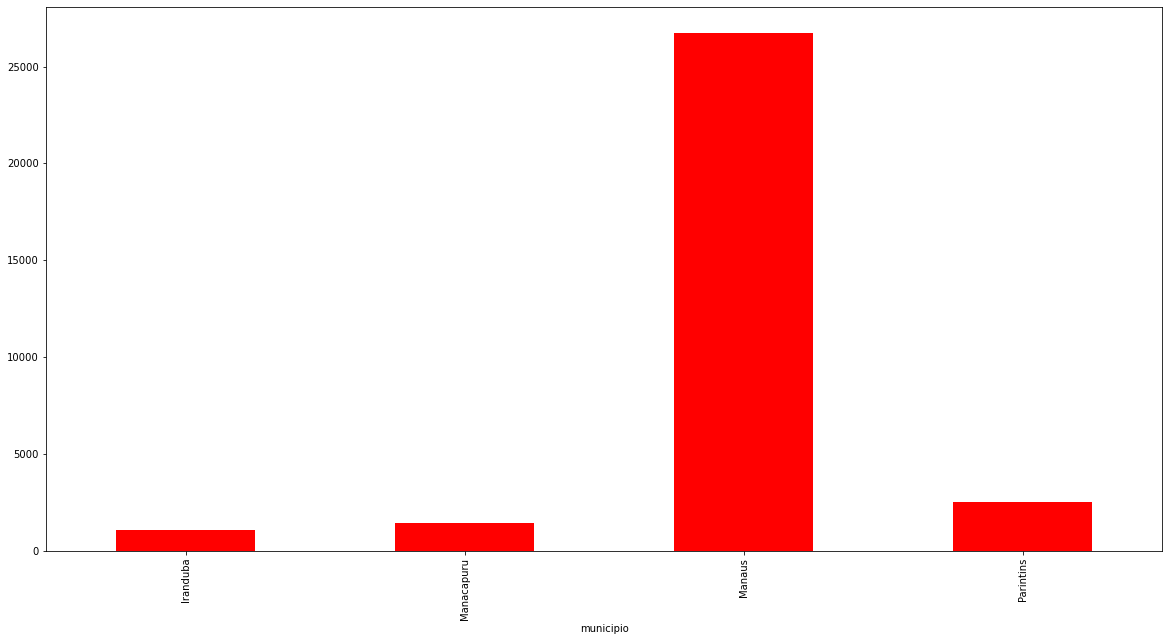

In [249]:
fig = grupo_municipios['casosAcumulado'].std().plot.bar(color='red')